In [2]:
import numpy as np
import pandas as pd
import urllib.request,os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D,Activation
from keras.models import Sequential
from sklearn import preprocessing


In [3]:
# 對整體資料做一些觀察
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')
print(train.info()) # 查看資料有無空值
print(train.describe()) # 查看資料分布
test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 觀察dataframe中的關係

0    549
1    342
Name: Survived, dtype: int64


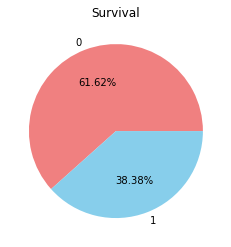

In [5]:
print(train['Survived'].value_counts())

train['Survived'].value_counts().plot(kind='pie',colors=['lightcoral','skyblue'],autopct='%1.2f%%')
plt.title( 'Survival' )  
plt.ylabel('')
plt.show()




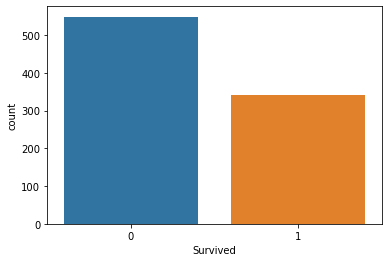

In [6]:
sns.countplot(train['Survived'])

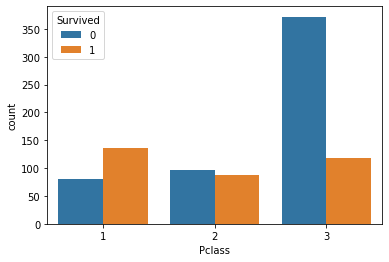

In [7]:
sns.countplot(train['Pclass'], hue=train['Survived'])

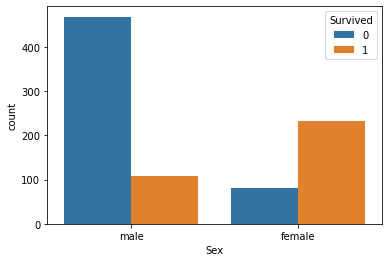

In [8]:
sns.countplot(train['Sex'], hue=train['Survived'])

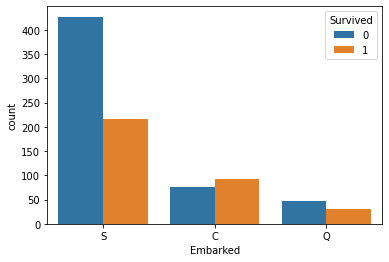

In [9]:
sns.countplot(train['Embarked'], hue=train['Survived'])

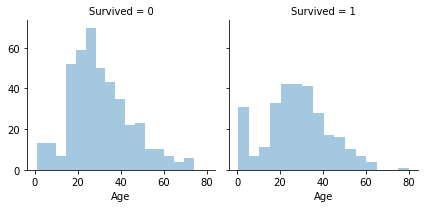

In [10]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

In [13]:
print(train['Survived'].value_counts())
print(train['Pclass'].value_counts())

print(train[['Survived','Pclass']])



0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
     Survived  Pclass
0           0       3
1           1       1
2           1       3
3           1       1
4           0       3
..        ...     ...
886         0       2
887         1       1
888         0       3
889         1       1
890         0       3

[891 rows x 2 columns]


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64
        Survived
Sex             
female       314
male         577


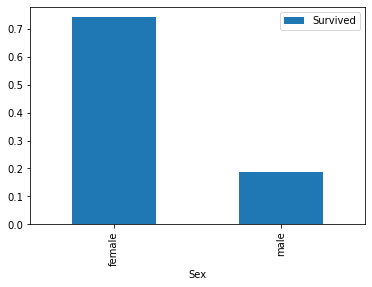

In [14]:
print(train.groupby(['Sex','Survived'])['Survived'].count())
print(train[['Sex','Survived']].groupby(['Sex']).count())
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar() #  男性及女性的存活率

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64
        Survived
Pclass          
1            216
2            184
3            491


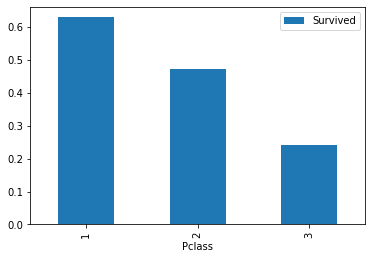

In [14]:
print(train.groupby(['Pclass','Survived'])['Survived'].count())
print(train[['Pclass','Survived']].groupby(['Pclass']).count())
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar() # 艙等的存活率

In [15]:
# 把train裡面需要的資料取出來
pd.options.mode.chained_assignment = 'warn'  # default='warn'
new_df=pd.read_csv('./dataset/train.csv')

cols=['Name','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_df=new_df[cols]

new_df.isnull().sum() # 查看空值
age_mean=new_df['Age'].mean()
new_df['Age']=new_df['Age'].fillna(age_mean)

new_df['Embarked'].value_counts() # 查看平均分布值
new_df['Embarked']=new_df['Embarked'].fillna('S')
print(new_df.isnull().sum()) # 確認空值是否清理完成

new_df['Sex']=new_df['Sex'].map({'female':0,'male':1}).astype(int) # sex轉 0,1
new_df=pd.get_dummies(data=new_df,columns=['Embarked']) # onehot和 map不太一樣
new_df=new_df.drop(['Name'],axis=1) # 移除不需要的欄位
new_df[:5]


Name        0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [16]:
# 把test裡面需要的資料取出來
pd.options.mode.chained_assignment = 'warn'  # default='warn'
test_df=pd.read_csv('./dataset/test.csv')

cols=['Name','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
test_df=test_df[cols]

test_df.isnull().sum() # 查看空值
age_mean=new_df['Age'].mean()
test_df['Age']=test_df['Age'].fillna(age_mean)

test_df['Embarked'].value_counts() # 查看平均分布值
test_df['Embarked']=test_df['Embarked'].fillna('S')
print(new_df.isnull().sum()) # 確認空值是否清理完成

test_df['Sex']=test_df['Sex'].map({'female':0,'male':1}).astype(int) # sex轉 0,1
test_df=pd.get_dummies(data=test_df,columns=['Embarked']) # onehot和 map不太一樣
test_df=test_df.drop(['Name'],axis=1) # 移除不需要的欄位
test_df[:5]

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [17]:
ndarray=new_df.values # dataframe轉成array
ndarray.shape
ndarray[:2] # 第0個欄位是label，其餘是特徵值
label=ndarray[:,0] # :表示所有筆數 ,0表示第一個欄位
features=ndarray[:,1:] # ,1:表示第2個欄位到最後一個欄位

minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1)) # 標準化至0,1
scale_feature=minmax_scale.fit_transform(features)
scale_feature[:2]


array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574, 1.        , 0.        , 0.        ]])

In [18]:
test_ndarray=test_df.values # dataframe轉成array
test_ndarray.shape
test_ndarray[:2] # 第0個欄位是label，其餘是特徵值
test_label=test_ndarray[:,0] # :表示所有筆數 ,0表示第一個欄位
test_features=test_ndarray[:,1:] # ,1:表示第2個欄位到最後一個欄位

test=minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1)) # 標準化至0,1
test_scale_feature=minmax_scale.fit_transform(test_features)
test_scale_feature[:2]

array([[1.        , 0.4527232 , 0.        , 0.        , 0.01528158,
        0.        , 1.        , 0.        ],
       [0.        , 0.61756561, 0.125     , 0.        , 0.01366309,
        0.        , 0.        , 1.        ]])

In [19]:
mask=np.random.rand(len(new_df))<0.8
train_df=new_df[mask]
test_df=new_df[~mask]
print('total:',len(mask))
print('train:',len(train_df))
print('test:',len(test_df))

total: 891
train: 724
test: 167


In [22]:
# 建立模型
model=Sequential()
model.add(Dense(units=1000,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=2000,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=2000,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=2000,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) # metrics設定要注意名稱一致，因為keras版本不同會影響後續plt傳入的參數名稱

train_history=model.fit(x=features,y=label,validation_split=0.1,epochs=20,batch_size=30,verbose=1)

Train on 801 samples, validate on 90 samples
Epoch 1/20
801/801 [==============================] - 0s 579us/step - loss: 1.6284 - accuracy: 0.5755 - val_loss: 0.5892 - val_accuracy: 0.6444
Epoch 2/20
801/801 [==============================] - 0s 302us/step - loss: 0.6236 - accuracy: 0.6679 - val_loss: 0.5647 - val_accuracy: 0.7222
Epoch 3/20
801/801 [==============================] - 0s 300us/step - loss: 0.6190 - accuracy: 0.6642 - val_loss: 0.5463 - val_accuracy: 0.6778
Epoch 4/20
801/801 [==============================] - 0s 335us/step - loss: 0.6168 - accuracy: 0.6816 - val_loss: 0.5280 - val_accuracy: 0.6889
Epoch 5/20
801/801 [==============================] - 0s 302us/step - loss: 0.5854 - accuracy: 0.7004 - val_loss: 0.4998 - val_accuracy: 0.7222
Epoch 6/20
801/801 [==============================] - 0s 298us/step - loss: 0.6040 - accuracy: 0.6816 - val_loss: 0.4985 - val_accuracy: 0.7333
Epoch 7/20
801/801 [==============================] - 0s 307us/step - loss: 0.5610 - accura

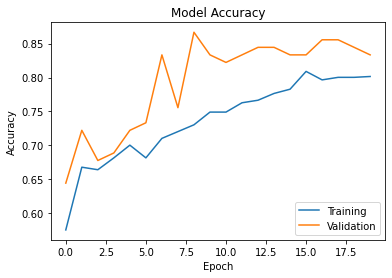

In [23]:
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

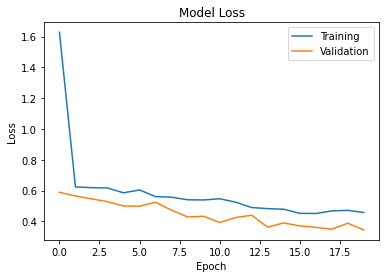

In [24]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')